In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [39]:
Data = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
Data.duplicated().sum()
Data['Exited'].value_counts()
Data['Gender'].value_counts()
Data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [41]:
Data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True, errors="ignore")
Data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
X = Data.drop(columns=["Exited"])
y = Data["Exited"]
x = pd.get_dummies(Data, columns=["Geography", "Gender"], drop_first=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=12))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6061 - loss: 0.6882 - val_accuracy: 0.9160 - val_loss: 0.3828
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9599 - loss: 0.2845 - val_accuracy: 0.9955 - val_loss: 0.0943
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9977 - loss: 0.0680 - val_accuracy: 1.0000 - val_loss: 0.0263
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0207 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_

In [45]:
model.summary()
model.layers[0].get_weights()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256 (1.00 KB)

[array([[ 0.14717434, -0.05889178,  0.19011685, -0.01739842,  0.02704908,
          0.01743788],
        [ 0.17867889, -0.1777216 ,  0.08276093, -0.03620423, -0.18067259,
          0.24445918],
        [ 0.5035117 , -0.41714135, -0.10646143, -0.01645214, -0.02778024,
         -0.02672784],
        [-0.13265945, -0.1260796 , -0.29982635,  0.31074682,  0.3846157 ,
         -0.02738892],
        [-0.0087355 ,  0.0889804 ,  0.5373974 , -0.18271664, -0.21222645,
         -0.57192475],
        [ 0.31297234, -0.2452219 , -0.30736762, -0.0615243 , -0.15171646,
         -0.2376322 ],
        [-0.26584247,  0.00879714, -0.59598106,  0.2064807 ,  0.38939628,
         -0.3521286 ],
        [ 0.53263825, -0.41840968,  0.04228451, -0.09357752, -0.01430878,
          0.14876845],
        [-1.1644045 , -0.53666806,  0.69564664,  1.1454374 , -0.97246826,
          0.31464863],
        [-0.1097785 ,  0.3799118 ,  0.49008742,  0.03506036, -0.5504987 ,
          0.03405084],
        [-0.33135346, -0.24446

In [46]:
y_pred_org = model.predict(x_test)
y_pred_org[:20]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.0741031e-03],
       [5.5120589e-04],
       [3.7703326e-04],
       [3.8120561e-04],
       [1.0586921e-03],
       [5.8741815e-04],
       [6.6766707e-04],
       [1.3238404e-04],
       [2.3052560e-03],
       [9.7424519e-04],
       [7.5379363e-04],
       [9.9153948e-01],
       [3.3560774e-04],
       [5.1640201e-04],
       [6.1203114e-04],
       [7.3003455e-04],
       [3.3274476e-04],
       [6.3031906e-04],
       [2.6170996e-03],
       [7.7879283e-04]], dtype=float32)

In [47]:
y_pred_org = model.predict(x_test)
y_pred_classified = np.where(y_pred_org > 0.5, 1, 0)
print("Accuracy:", accuracy_score(y_test, y_pred_classified))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classified))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classified))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 1.0

Confusion Matrix:
 [[1585    0]
 [   0  415]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1585
           1       1.00      1.00      1.00       415

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.9262e-04 - val_accuracy: 1.0000 - val_loss: 5.7694e-04
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.3259e-04 - val_accuracy: 1.0000 - val_loss: 4.4963e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.1557e-04 - val_accuracy: 1.0000 - val_loss: 3.5627e-04
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.3644e-04 - val_accuracy: 1.0000 - val_loss: 2.8621e-04
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.6550e-04 - val_accuracy: 1.0000 - val_loss: 2.3200e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.1162e-04 - val_accuracy: 1.0000 - val_loss: 1.8962e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.7738e-04 - val_accuracy: 1.0000 - val_loss: 1.5621e-04
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

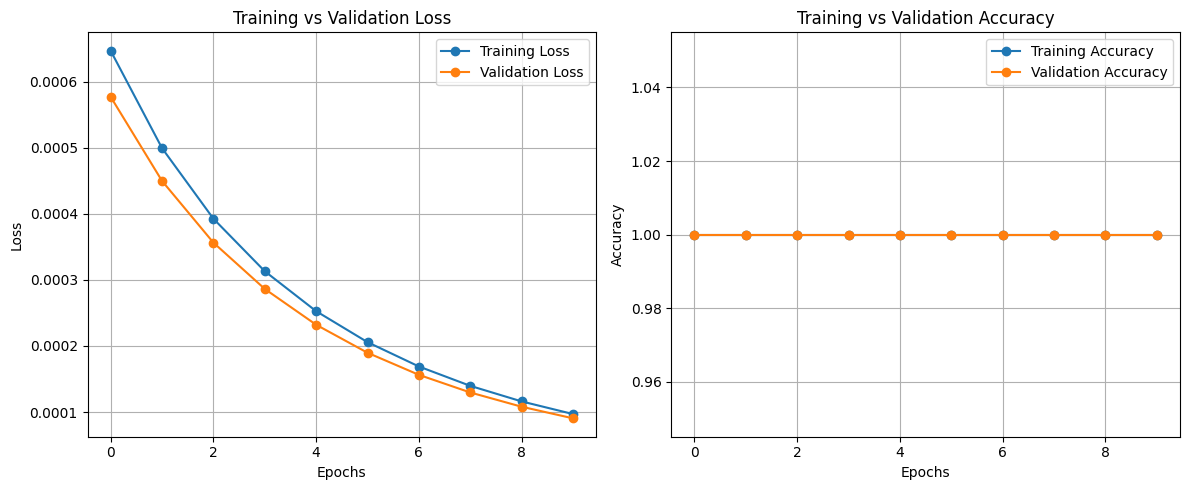

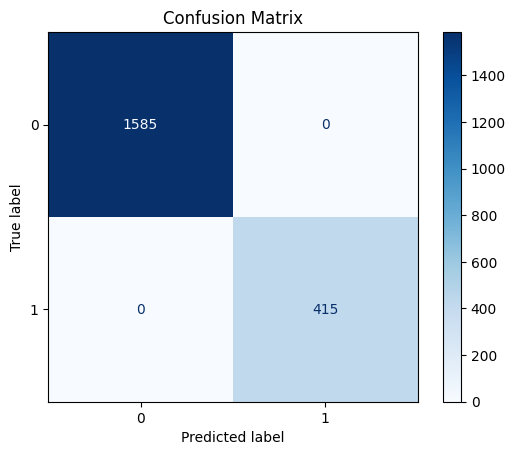

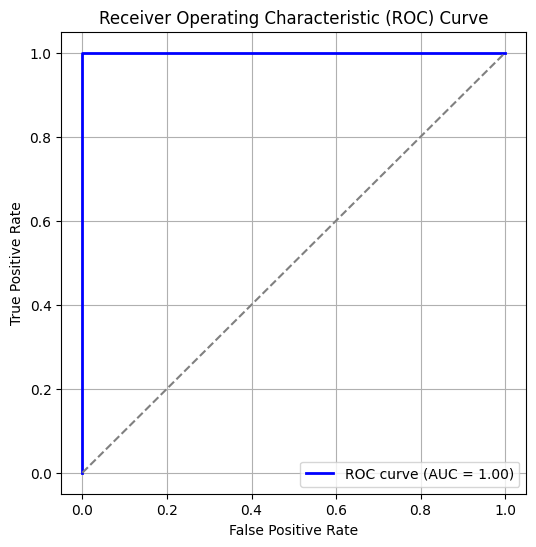

In [48]:

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)


y_pred_org = model.predict(x_test)
y_pred_classified = np.where(y_pred_org > 0.5, 1, 0)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_classified))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classified))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classified))


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_classified)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_org)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

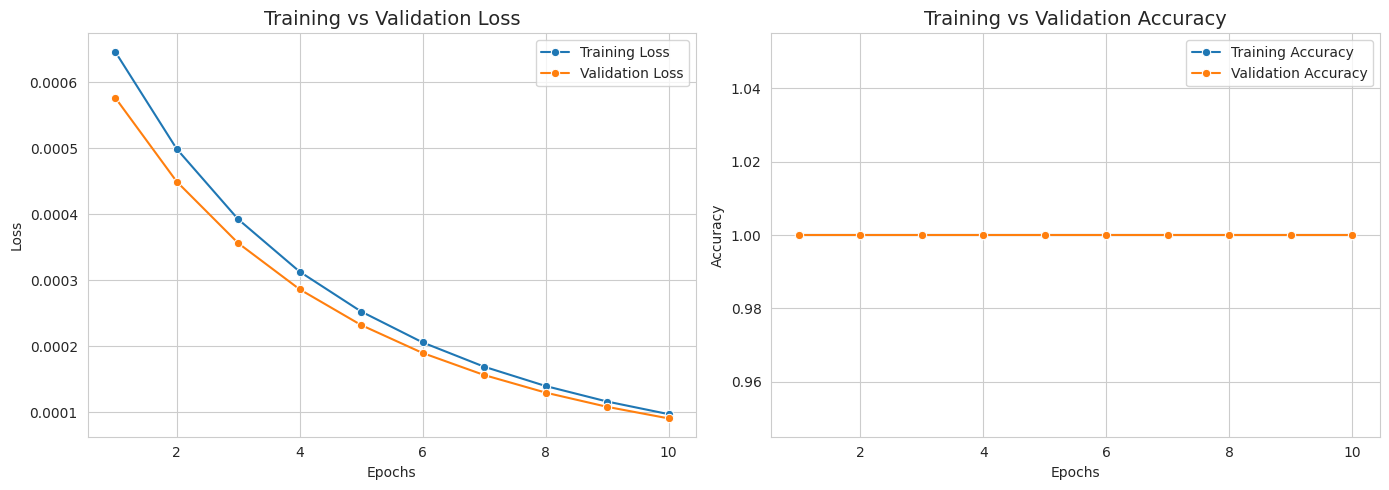

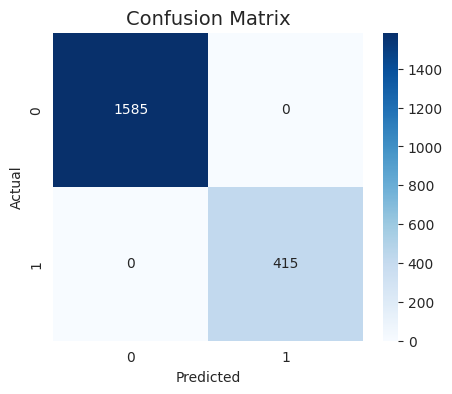

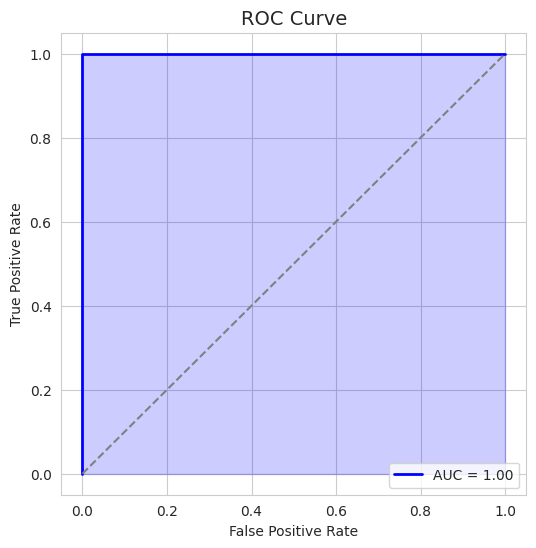

NameError: name 'precision_recall_curve' is not defined

In [52]:

y_pred_org = model.predict(x_test)
y_pred_classified = np.where(y_pred_org > 0.5, 1, 0)
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss', marker='o')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss', marker='o')
plt.title("Training vs Validation Loss", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, len(history.history['accuracy']) + 1), y=history.history['accuracy'], label='Training Accuracy', marker='o')
sns.lineplot(x=range(1, len(history.history['val_accuracy']) + 1), y=history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title("Training vs Validation Accuracy", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# ==============================
# 2. Confusion Matrix Heatmap
# ==============================
cm = confusion_matrix(y_test, y_pred_classified)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

# ==============================
# 3. ROC Curve with shaded AUC
# ==============================
fpr, tpr, _ = roc_curve(y_test, y_pred_org)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.fill_between(fpr, tpr, alpha=0.2, color="blue")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_pred_org)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve", fontsize=14)
plt.grid(True)
plt.show()


report = classification_report(y_test, y_pred_classified, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # only class 0 and 1, precision, recall, f1

metrics_df.plot(kind='bar', figsize=(8, 5), color=["skyblue", "lightgreen", "salmon"])
plt.title("Precision, Recall, F1-score per class", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()